### Data Preprocessing

Let's import some basic required packages.

In [1]:
#  Import some data manipulation and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Read datasets

In [2]:
# Read all the given datasets into separate dataframes
aquifer_auser = pd.read_csv("acea-water-prediction/Aquifer_Auser.csv")
aquifer_doganella = pd.read_csv("acea-water-prediction/Aquifer_Doganella.csv")
aquifer_luco = pd.read_csv("acea-water-prediction/Aquifer_Luco.csv")
aquifer_petrignago = pd.read_csv("acea-water-prediction/Aquifer_Petrignano.csv")
lake_bilancino = pd.read_csv("acea-water-prediction//Lake_Bilancino.csv")
river_arno = pd.read_csv("acea-water-prediction//River_Arno.csv")
spring_amiata = pd.read_csv("acea-water-prediction//Water_Spring_Amiata.csv")
spring_lupa = pd.read_csv("acea-water-prediction/Water_Spring_Lupa.csv")
spring_madonna = pd.read_csv("acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv")

#### Imputation of missing values

In [3]:
aquifer_auser.isnull().sum()*100/len(aquifer_auser)

Date                                        0.000000
Rainfall_Gallicano                         35.062546
Rainfall_Pontetetto                        35.062546
Rainfall_Monte_Serra                       35.136130
Rainfall_Orentano                          35.062546
Rainfall_Borgo_a_Mozzano                   35.062546
Rainfall_Piaggione                         39.538877
Rainfall_Calavorno                         35.062546
Rainfall_Croce_Arcana                      35.062546
Rainfall_Tereglio_Coreglia_Antelminelli    35.062546
Rainfall_Fabbriche_di_Vallico              35.062546
Depth_to_Groundwater_LT2                   41.108658
Depth_to_Groundwater_SAL                   44.260486
Depth_to_Groundwater_PAG                   53.311258
Depth_to_Groundwater_CoS                   47.081187
Depth_to_Groundwater_DIEC                  59.896983
Temperature_Orentano                        0.000000
Temperature_Monte_Serra                     0.000000
Temperature_Ponte_a_Moriano                 0.

##### Impute all input and target features with knn imputation

In [4]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error, r2_score

In [5]:
# split into input and output elements
X = aquifer_auser[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']]
y = aquifer_auser[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']]


k_values = [1,3,5,7,9,15,18,21]
mean_ae_errors = []
median_ae_errors = []
mse_errors = []
rmse_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    mean_ae_errors.append(median_absolute_error(ytrans,yhat))
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    mse_errors.append(mean_squared_error(ytrans,yhat))
    rmse_errors.append(np.sqrt(mean_squared_error(ytrans,yhat)))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

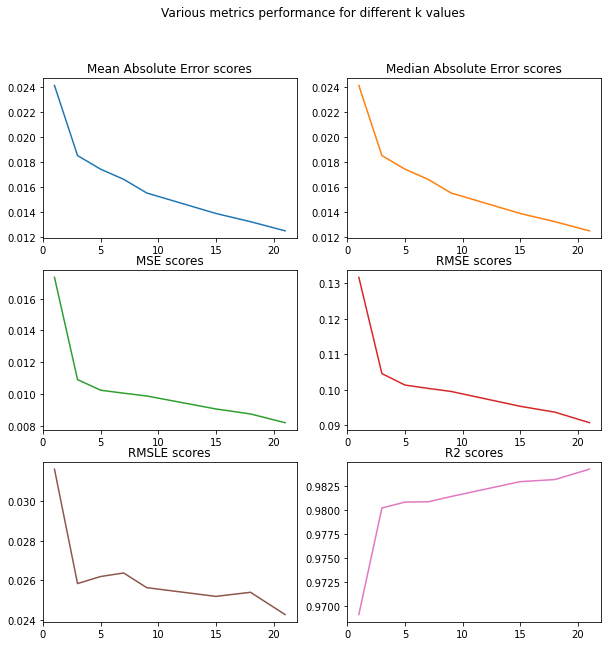

In [6]:
fig, axs = plt.subplots(3, 2,figsize=(10,10))
fig.suptitle('Various metrics performance for different k values')

axs[0, 0].plot(k_values, mean_ae_errors)
axs[0, 0].set_title('Mean Absolute Error scores')
axs[0, 1].plot(k_values, median_ae_errors, 'tab:orange')
axs[0, 1].set_title('Median Absolute Error scores')
axs[1, 0].plot(k_values, mse_errors, 'tab:green')
axs[1, 0].set_title('MSE scores')
axs[1, 1].plot(k_values, rmse_errors, 'tab:red')
axs[1, 1].set_title('RMSE scores')
axs[2, 0].plot(k_values, rmsle_errors, 'tab:brown')
axs[2, 0].set_title('RMSLE scores')
axs[2, 1].plot(k_values, r2_errors, 'tab:pink')
axs[2, 1].set_title('R2 scores')


###### Final Metrics

We have chosen our metrics for the problem as **Median Absolute Error (MAE), Root Mean Square Log Error(RMSLE) and R Squared (R²)** because of the following reasons - 

- MAE is robust to outliers whereas RMSE is not. Using median is an extreme way of trimming extreme values. Hence median absolute error reduces the bias in favour of low forecasts. Also, MAE is really suited from an interpretation standpoint.


- RMSLE is used because the underestimation of the target variable is not acceptable but overestimation can be tolerated. The RMLSE incurs a larger penalty for the underestimation of the actual value. Also, we don’t want to penalize huge differences in the predicted and the actual values when both predicted and actual values are huge numbers. RMSLE metric (unlike RMSE) only considers the relative error between and the Predicted and the actual value and the scale of the error is not significant.


- High R² means that the correlation between observed and predicted values is high. It tells how good our regression model is as compared to a very simple model that just predicts the mean value of target from the train set as predictions.


##### Impute independent features with knn and predict for missing dependent variable values

In [7]:
#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_auser_filtered = aquifer_auser[aquifer_auser[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']].notna().all(axis=1)]

# split into input and output elements
X = aquifer_auser_filtered[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']]
y = aquifer_auser_filtered[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)


Text(0.5, 1.0, 'KNN scores')

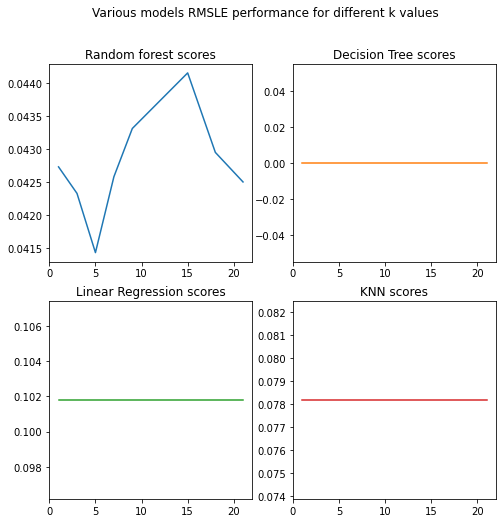

In [8]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

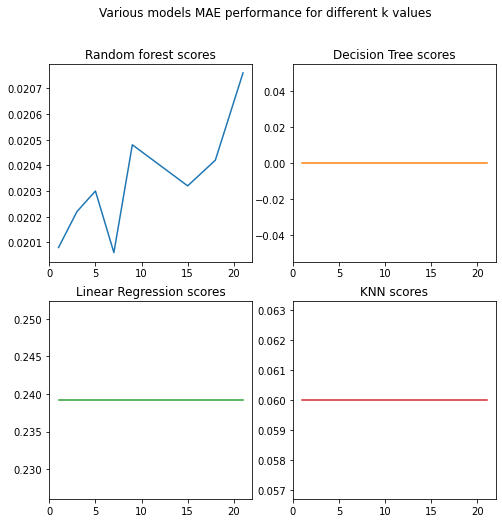

In [9]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

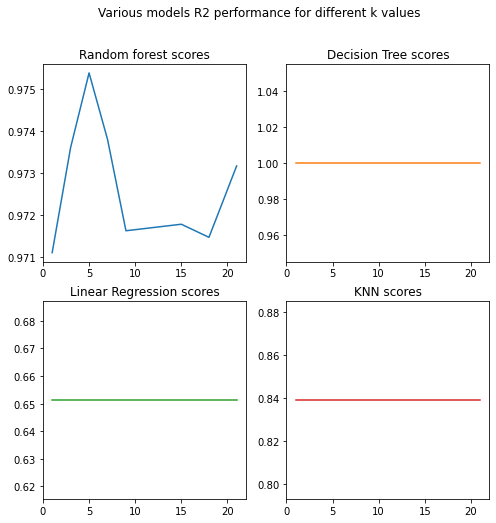

In [10]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Random Forest Regressor

In [11]:
X = aquifer_auser[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']]
imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_auser_filtered = aquifer_auser[aquifer_auser[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = aquifer_auser_filtered[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']]
non_null_depth_y = aquifer_auser_filtered[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']]

imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = RandomForestRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(8154, 5)

In [12]:
# Final preprocessed Aquifer Auser dataset

aquifer_auser_filled = pd.DataFrame(X,columns=['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'])
aquifer_auser_filled['Date'] = aquifer_auser['Date']
aquifer_auser_filled['Depth_to_Groundwater_LT2'] = predicted_target_values[:,0]
aquifer_auser_filled['Depth_to_Groundwater_SAL'] = predicted_target_values[:,1]
aquifer_auser_filled['Depth_to_Groundwater_PAG'] = predicted_target_values[:,2]
aquifer_auser_filled['Depth_to_Groundwater_CoS'] = predicted_target_values[:,3]
aquifer_auser_filled['Depth_to_Groundwater_DIEC'] = predicted_target_values[:,4]

In [13]:
aquifer_auser_filled.head()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione,Date,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS,Depth_to_Groundwater_DIEC
0,0.411111,0.888889,0.955556,3.744444,0.300000,0.355556,0.044444,0.000000,1.011111,0.200000,...,-1952.167294,-1265.142742,0.335000,-0.217778,05/03/1998,-12.7626,-5.2433,-1.5076,-6.2207,-3.6344
1,2.522222,2.300000,5.633333,1.744444,1.888889,1.900000,2.155556,5.288889,1.077778,5.066667,...,-2298.653930,-1589.955389,0.336111,-0.222222,06/03/1998,-12.6611,-5.2472,-1.4902,-6.1697,-3.7184
2,4.000000,7.155556,5.933333,7.122222,5.566667,6.055556,5.144444,1.222222,1.933333,7.577778,...,-3277.130021,-2120.439529,0.280000,-0.417222,07/03/1998,-12.7997,-5.3610,-1.7483,-6.2689,-4.1235
3,1.744444,2.366667,2.855556,2.311111,1.755556,2.122222,1.777778,1.033333,1.500000,3.044444,...,-2330.044665,-1357.986367,0.223889,-0.295000,08/03/1998,-12.8360,-5.4302,-1.8655,-6.5287,-4.1332
4,1.744444,2.366667,2.855556,2.333333,1.755556,2.122222,1.777778,1.033333,1.500000,3.044444,...,-1999.153792,-1154.367319,0.223889,-0.295000,09/03/1998,-12.8764,-5.4327,-1.8799,-6.5636,-4.1442


In [14]:
aquifer_auser_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rainfall_Gallicano                       8154 non-null   float64
 1   Rainfall_Pontetetto                      8154 non-null   float64
 2   Rainfall_Monte_Serra                     8154 non-null   float64
 3   Rainfall_Orentano                        8154 non-null   float64
 4   Rainfall_Borgo_a_Mozzano                 8154 non-null   float64
 5   Rainfall_Piaggione                       8154 non-null   float64
 6   Rainfall_Calavorno                       8154 non-null   float64
 7   Rainfall_Croce_Arcana                    8154 non-null   float64
 8   Rainfall_Tereglio_Coreglia_Antelminelli  8154 non-null   float64
 9   Rainfall_Fabbriche_di_Vallico            8154 non-null   float64
 10  Temperature_Orentano                     8154 no

**Aquifer Doganella:**

In [15]:
aquifer_doganella.isnull().sum()*100/len(aquifer_doganella)

Date                             0.000000
Rainfall_Monteporzio            10.404912
Rainfall_Velletri               10.819781
Depth_to_Groundwater_Pozzo_1    57.899104
Depth_to_Groundwater_Pozzo_2    54.596747
Depth_to_Groundwater_Pozzo_3    53.966147
Depth_to_Groundwater_Pozzo_4    60.604049
Depth_to_Groundwater_Pozzo_5    58.380352
Depth_to_Groundwater_Pozzo_6    59.707932
Depth_to_Groundwater_Pozzo_7    61.649519
Depth_to_Groundwater_Pozzo_8    57.666777
Depth_to_Groundwater_Pozzo_9    61.184866
Volume_Pozzo_1                  77.497511
Volume_Pozzo_2                  77.431132
Volume_Pozzo_3                  77.431132
Volume_Pozzo_4                  77.431132
Volume_Pozzo_5+6                77.431132
Volume_Pozzo_7                  77.431132
Volume_Pozzo_8                  77.431132
Volume_Pozzo_9                  77.431132
Temperature_Monteporzio         24.261533
Temperature_Velletri            27.265184
dtype: float64

In [16]:
# split into input and output elements
X = aquifer_doganella[['Rainfall_Monteporzio', 'Rainfall_Velletri',
                       'Volume_Pozzo_1', 'Volume_Pozzo_2',
       'Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
       'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9',
       'Temperature_Monteporzio', 'Temperature_Velletri']]
y = aquifer_doganella[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

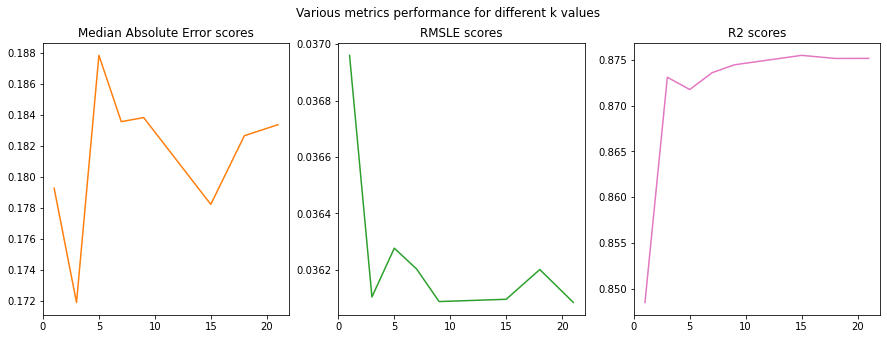

In [17]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [18]:
#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_doganella_filtered = aquifer_doganella[aquifer_doganella[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9']].notna().all(axis=1)]

# split into input and output elements
X = aquifer_doganella_filtered[['Rainfall_Monteporzio', 'Rainfall_Velletri',
                       'Volume_Pozzo_1', 'Volume_Pozzo_2',
       'Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
       'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9',
       'Temperature_Monteporzio', 'Temperature_Velletri']]
y = aquifer_doganella_filtered[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

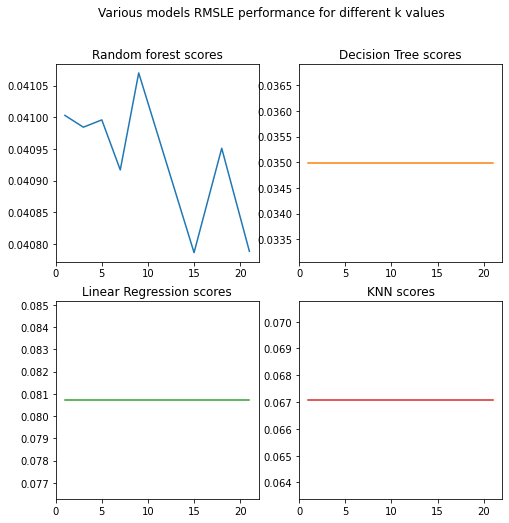

In [19]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

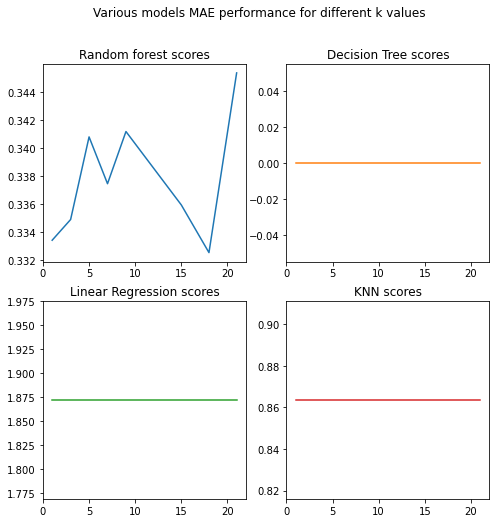

In [20]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

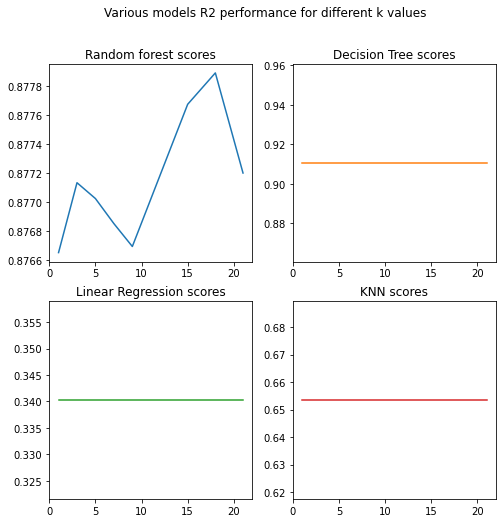

In [21]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Decision Trees Regressor

In [22]:
X = aquifer_doganella[['Rainfall_Monteporzio', 'Rainfall_Velletri',
                       'Volume_Pozzo_1', 'Volume_Pozzo_2',
       'Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
       'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9',
       'Temperature_Monteporzio', 'Temperature_Velletri']]
imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_doganella_filtered = aquifer_doganella[aquifer_doganella[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = aquifer_doganella_filtered[['Rainfall_Monteporzio', 'Rainfall_Velletri', 
                                              'Volume_Pozzo_1', 'Volume_Pozzo_2',
                                              'Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
                                              'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9',
                                              'Temperature_Monteporzio', 'Temperature_Velletri']]
non_null_depth_y = aquifer_doganella_filtered[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9']]

imputer = KNNImputer(n_neighbors=15, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = DecisionTreeRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(6026, 9)

In [23]:
# Final preprocessed Aquifer Doganella dataset

aquifer_doganella_filled = pd.DataFrame(X,columns=['Rainfall_Monteporzio', 'Rainfall_Velletri'
                                                   , 'Volume_Pozzo_1', 'Volume_Pozzo_2',
                                                   'Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
                                                   'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9',
                                                   'Temperature_Monteporzio', 'Temperature_Velletri'])

aquifer_doganella_filled['Date'] = aquifer_doganella['Date']
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_1'] = predicted_target_values[:,0]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_2'] = predicted_target_values[:,1]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_3'] = predicted_target_values[:,2]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_4'] = predicted_target_values[:,3]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_5'] = predicted_target_values[:,4]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_6'] = predicted_target_values[:,5]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_7'] = predicted_target_values[:,6]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_8'] = predicted_target_values[:,7]
aquifer_doganella_filled['Depth_to_Groundwater_Pozzo_9'] = predicted_target_values[:,8]

In [24]:
aquifer_doganella_filled.head()

,Rainfall_Monteporzio,Rainfall_Velletri,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,...,Date,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,Depth_to_Groundwater_Pozzo_8,Depth_to_Groundwater_Pozzo_9
0,0.0,0.0,905.359444,3395.675000,3308.880000,3648.175556,7942.792222,2813.390000,4034.640000,3189.642778,...,01/01/2004,-28.20,-93.45,-112.87,-97.95,-100.26,-91.72,-93.85,-95.53,-95.98
1,0.2,0.8,941.191667,3090.943333,3419.757778,3210.420000,5760.560000,2422.122222,3504.718333,3231.843889,...,02/01/2004,-34.34,-93.66,-113.39,-98.00,-100.35,-91.73,-93.99,-95.66,-93.23
2,0.0,0.0,985.642778,3105.218889,3299.135000,3541.243889,7733.685556,2640.881111,3883.077222,3045.289444,...,03/01/2004,-24.84,-91.22,-107.76,-96.23,-97.44,-90.19,-91.84,-93.34,-93.85
3,0.0,0.0,352.377778,3370.311111,3286.296111,3651.676667,7964.862222,2851.721667,4053.053889,3228.443333,...,04/01/2004,-28.20,-93.45,-112.87,-97.95,-100.26,-91.72,-93.85,-95.53,-95.98
4,0.2,0.0,668.426667,2866.595556,3167.102222,3310.817778,7226.372778,2587.578333,3727.723333,2893.208333,...,05/01/2004,-35.87,-99.60,-114.12,-100.67,-104.14,-93.26,-97.43,-98.62,-92.71


In [25]:
aquifer_doganella_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6026 entries, 0 to 6025
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rainfall_Monteporzio          6026 non-null   float64
 1   Rainfall_Velletri             6026 non-null   float64
 2   Volume_Pozzo_1                6026 non-null   float64
 3   Volume_Pozzo_2                6026 non-null   float64
 4   Volume_Pozzo_3                6026 non-null   float64
 5   Volume_Pozzo_4                6026 non-null   float64
 6   Volume_Pozzo_5+6              6026 non-null   float64
 7   Volume_Pozzo_7                6026 non-null   float64
 8   Volume_Pozzo_8                6026 non-null   float64
 9   Volume_Pozzo_9                6026 non-null   float64
 10  Temperature_Monteporzio       6026 non-null   float64
 11  Temperature_Velletri          6026 non-null   float64
 12  Date                          6026 non-null   object 
 13  Dep

**Aquifer Luco:**

In [26]:
aquifer_luco.isnull().sum()*100/len(aquifer_luco)

Date                                    0.000000
Rainfall_Simignano                      8.882062
Rainfall_Siena_Poggio_al_Vento         87.297983
Rainfall_Mensano                       77.000134
Rainfall_Montalcinello                 12.848938
Rainfall_Monticiano_la_Pineta          70.548952
Rainfall_Sovicille                     11.085882
Rainfall_Ponte_Orgia                   83.170829
Rainfall_Scorgiano                     59.449713
Rainfall_Pentolina                     71.737679
Rainfall_Monteroni_Arbia_Biena         58.541472
Depth_to_Groundwater_Podere_Casetta    55.309203
Depth_to_Groundwater_Pozzo_1           86.483238
Depth_to_Groundwater_Pozzo_3           87.712034
Depth_to_Groundwater_Pozzo_4           87.057566
Temperature_Siena_Poggio_al_Vento       0.000000
Temperature_Mensano                     0.000000
Temperature_Pentolina                   0.000000
Temperature_Monteroni_Arbia_Biena       0.000000
Volume_Pozzo_1                         73.180179
Volume_Pozzo_3      

In [27]:
# split into input and output elements
X = aquifer_luco[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena', 'Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena', 'Volume_Pozzo_1', 'Volume_Pozzo_3',
       'Volume_Pozzo_4']]
y = aquifer_luco[['Depth_to_Groundwater_Podere_Casetta',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

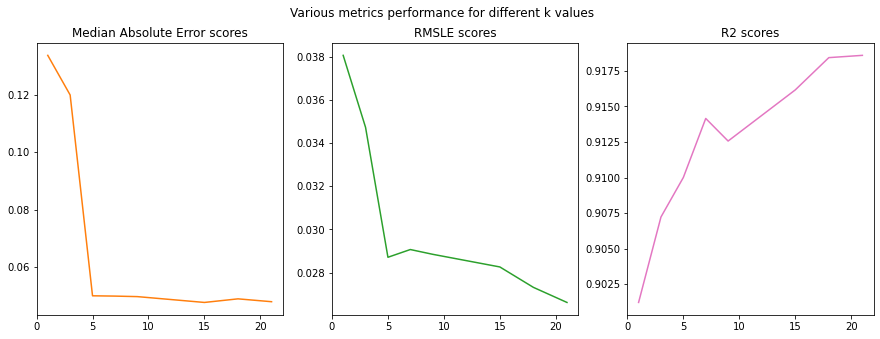

In [28]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [29]:
#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_luco_filtered = aquifer_luco[aquifer_luco[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4']].notna().all(axis=1)]

# split into input and output elements
X = aquifer_luco_filtered[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena', 'Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena', 'Volume_Pozzo_1', 'Volume_Pozzo_3',
       'Volume_Pozzo_4']]
y = aquifer_luco_filtered[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

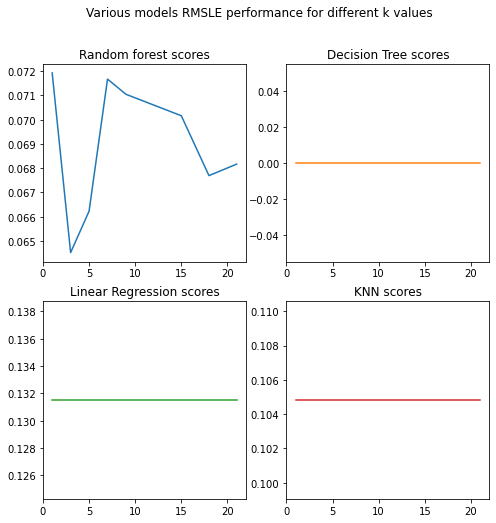

In [30]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

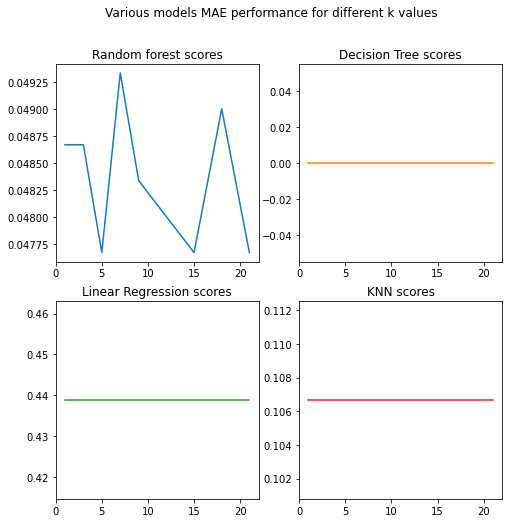

In [31]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

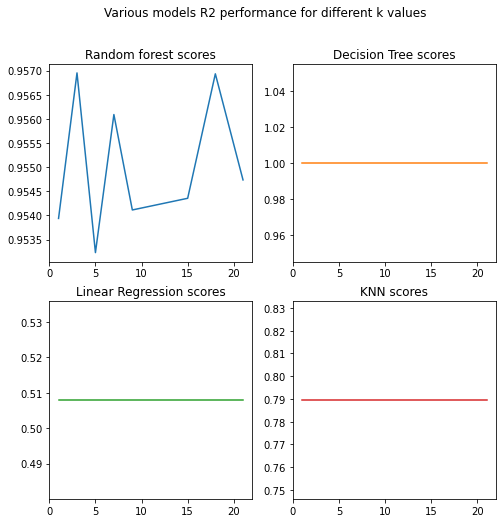

In [32]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Random Forest Regressor

In [33]:
X = aquifer_luco[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena', 'Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena', 'Volume_Pozzo_1', 'Volume_Pozzo_3',
       'Volume_Pozzo_4']]
imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_luco_filtered = aquifer_luco[aquifer_luco[['Depth_to_Groundwater_Podere_Casetta',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = aquifer_luco_filtered[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena', 'Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena', 'Volume_Pozzo_1', 'Volume_Pozzo_3',
       'Volume_Pozzo_4']]
non_null_depth_y = aquifer_luco_filtered[['Depth_to_Groundwater_Podere_Casetta',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4']]

imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = RandomForestRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(7487, 4)

In [34]:
# Final preprocessed Aquifer Luco dataset

aquifer_luco_filled = pd.DataFrame(X,columns=['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena', 'Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena', 'Volume_Pozzo_1', 'Volume_Pozzo_3',
       'Volume_Pozzo_4'])

aquifer_luco_filled['Date'] = aquifer_luco['Date']
aquifer_luco_filled['Depth_to_Groundwater_Podere_Casetta'] = predicted_target_values[:,0]
aquifer_luco_filled['Depth_to_Groundwater_Pozzo_1'] = predicted_target_values[:,1]
aquifer_luco_filled['Depth_to_Groundwater_Pozzo_3'] = predicted_target_values[:,2]
aquifer_luco_filled['Depth_to_Groundwater_Pozzo_4'] = predicted_target_values[:,3]

In [35]:
aquifer_luco_filled.head()

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4,Date,Depth_to_Groundwater_Podere_Casetta,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4
0,1.622222,2.011111,1.644444,2.511111,1.488889,2.333333,0.655556,0.466667,45.811111,0.644444,...,5.50,0.80,-121.332946,-109.375401,-93.788616,01/01/2000,-7.677,-11.261,-9.884,-12.671
1,1.322222,3.733333,1.277778,2.122222,1.455556,0.977778,4.555556,1.266667,109.388889,0.833333,...,6.20,3.25,-88.542661,-86.433535,-101.723363,02/01/2000,-7.674,-11.221,-9.955,-12.596
2,1.855556,1.588889,1.733333,1.844444,1.388889,1.455556,1.566667,0.966667,78.100000,0.755556,...,7.25,0.95,-99.533212,-94.471624,-101.621894,03/01/2000,-7.675,-11.249,-9.887,-12.596
3,0.011111,5.100000,1.966667,0.033333,1.455556,0.055556,4.555556,17.188889,9.877778,0.322222,...,7.00,4.20,-86.144651,-83.958166,-104.752506,04/01/2000,-7.673,-11.242,-9.966,-12.676
4,2.588889,5.366667,2.577778,0.822222,0.022222,0.400000,4.677778,9.066667,9.211111,0.422222,...,7.90,6.55,-88.773135,-85.243524,-116.948407,05/01/2000,-7.665,-11.256,-9.891,-12.694


In [36]:
aquifer_luco_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rainfall_Simignano                   7487 non-null   float64
 1   Rainfall_Siena_Poggio_al_Vento       7487 non-null   float64
 2   Rainfall_Mensano                     7487 non-null   float64
 3   Rainfall_Montalcinello               7487 non-null   float64
 4   Rainfall_Monticiano_la_Pineta        7487 non-null   float64
 5   Rainfall_Sovicille                   7487 non-null   float64
 6   Rainfall_Ponte_Orgia                 7487 non-null   float64
 7   Rainfall_Scorgiano                   7487 non-null   float64
 8   Rainfall_Pentolina                   7487 non-null   float64
 9   Rainfall_Monteroni_Arbia_Biena       7487 non-null   float64
 10  Temperature_Siena_Poggio_al_Vento    7487 non-null   float64
 11  Temperature_Mensano           

**Aquifer Petrignago:**

In [102]:
aquifer_petrignago.isnull().sum()*100/len(aquifer_petrignago)

Date                                     0.000000
Rainfall_Bastia_Umbra                   19.605591
Depth_to_Groundwater_P24                 1.053035
Depth_to_Groundwater_P25                 0.746697
Temperature_Bastia_Umbra                19.605591
Temperature_Petrignano                  19.605591
Volume_C10_Petrignano                    3.790925
Hydrometry_Fiume_Chiascio_Petrignano    19.605591
dtype: float64

In [104]:
# split into input and output elements
X = aquifer_petrignago[['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano']]
y = aquifer_petrignago[['Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

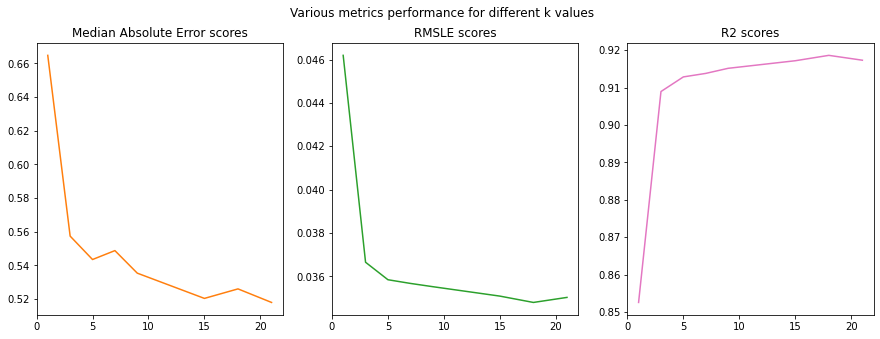

In [105]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [107]:
#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_petrignago_filtered = aquifer_petrignago[aquifer_petrignago[['Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25']].notna().all(axis=1)]

# split into input and output elements
X = aquifer_petrignago_filtered[['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano']]
y = aquifer_petrignago_filtered[['Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

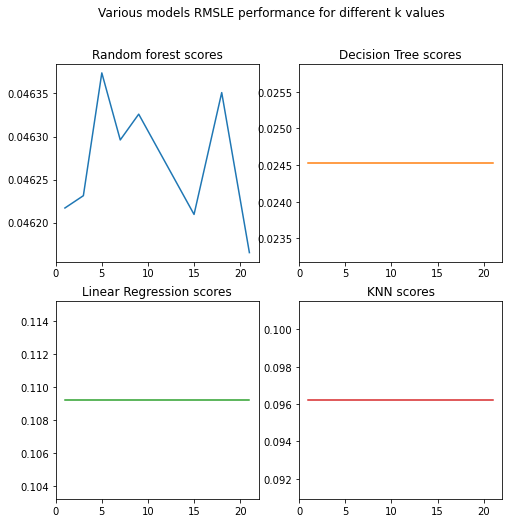

In [108]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

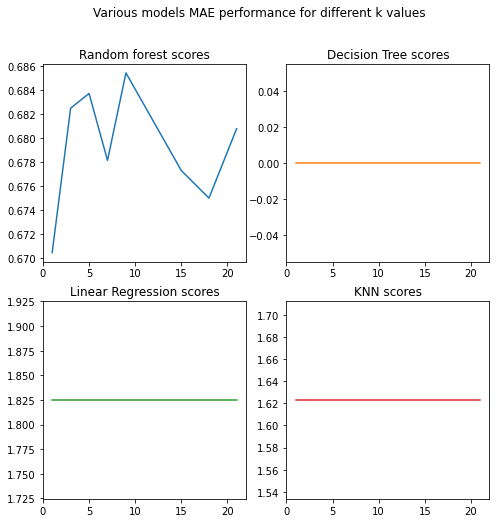

In [109]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

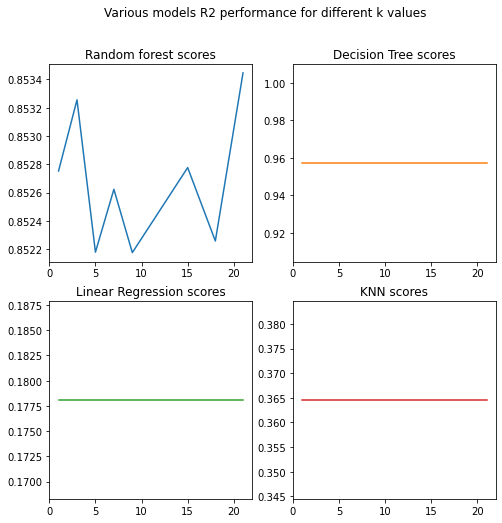

In [110]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Decision Trees Regressor

In [112]:
X = aquifer_petrignago[['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano']]


imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_petrignago_filtered = aquifer_petrignago[aquifer_petrignago[['Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25',]].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = aquifer_petrignago_filtered[['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano']]
non_null_depth_y = aquifer_petrignago_filtered[['Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25']]

imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = DecisionTreeRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(5223, 2)

In [113]:
# Final preprocessed Aquifer Petrignago dataset
aquifer_petrignago_filled = pd.DataFrame(X,columns=['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'])

aquifer_petrignago_filled['Date'] = aquifer_petrignago['Date']
aquifer_petrignago_filled['Depth_to_Groundwater_P24'] = predicted_target_values[:,0]
aquifer_petrignago_filled['Depth_to_Groundwater_P25'] = predicted_target_values[:,1]

In [114]:
aquifer_petrignago_filled.head()

,Rainfall_Bastia_Umbra,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25
0,1.556633,15.030293,13.739081,-29043.296726,2.372517,14/03/2006,-31.58,-30.75
1,1.556633,15.030293,13.739081,-29043.296726,2.372517,15/03/2006,-31.58,-30.75
2,1.556633,15.030293,13.739081,-29043.296726,2.372517,16/03/2006,-31.58,-30.75
3,1.556633,15.030293,13.739081,-29043.296726,2.372517,17/03/2006,-31.58,-30.75
4,1.556633,15.030293,13.739081,-29043.296726,2.372517,18/03/2006,-31.58,-30.75


In [115]:
aquifer_petrignago_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rainfall_Bastia_Umbra                 5223 non-null   float64
 1   Temperature_Bastia_Umbra              5223 non-null   float64
 2   Temperature_Petrignano                5223 non-null   float64
 3   Volume_C10_Petrignano                 5223 non-null   float64
 4   Hydrometry_Fiume_Chiascio_Petrignano  5223 non-null   float64
 5   Date                                  5223 non-null   object 
 6   Depth_to_Groundwater_P24              5223 non-null   float64
 7   Depth_to_Groundwater_P25              5223 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


**Lake Bilacino:**

In [37]:
lake_bilancino.isnull().sum()*100/len(lake_bilancino)

Date                    0.000000
Rainfall_S_Piero        8.738452
Rainfall_Mangona        8.738452
Rainfall_S_Agata        8.738452
Rainfall_Cavallina      8.738452
Rainfall_Le_Croci       8.738452
Temperature_Le_Croci    8.753597
Lake_Level              0.000000
Flow_Rate               0.318037
dtype: float64

In [38]:
# split into input and output elements
X = lake_bilancino[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']]
y = lake_bilancino[['Lake_Level', 'Flow_Rate']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

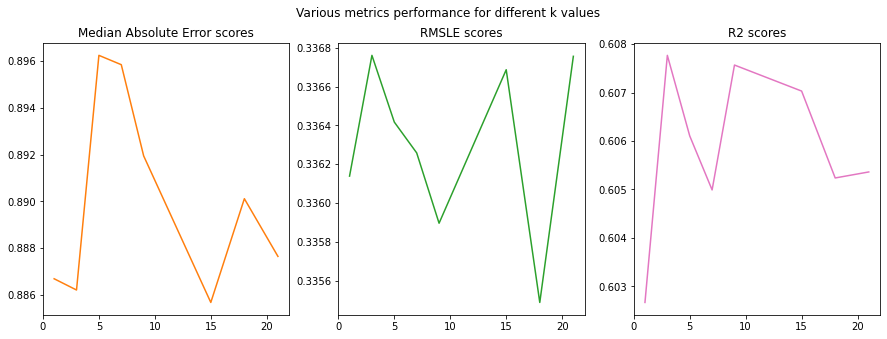

In [39]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [40]:
#Using only the rows with non-null target values i.e. Lake level, flow rate features
lake_bilancino_filtered = lake_bilancino[lake_bilancino[['Lake_Level', 'Flow_Rate']].notna().all(axis=1)]

# split into input and output elements
X = lake_bilancino_filtered[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']]
y = lake_bilancino_filtered[['Lake_Level', 'Flow_Rate']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

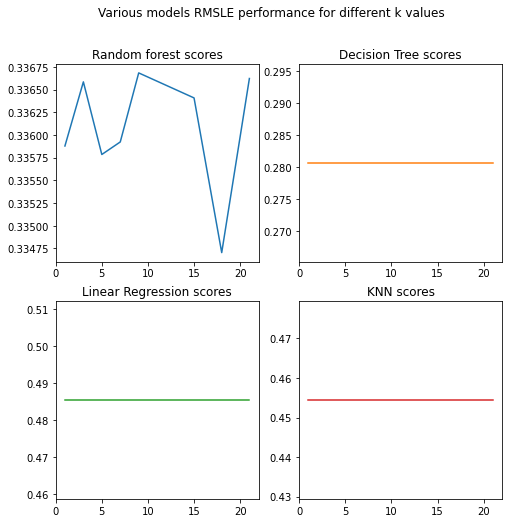

In [41]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

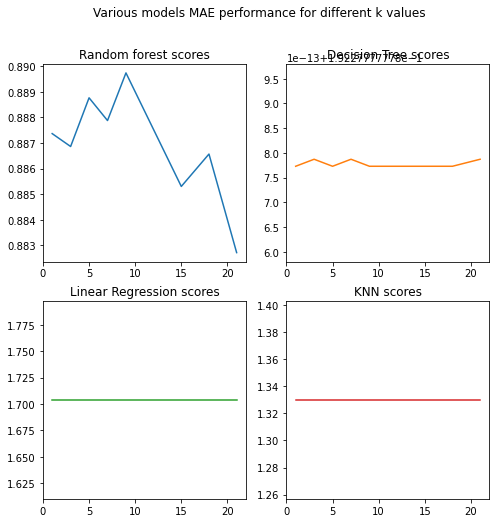

In [42]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

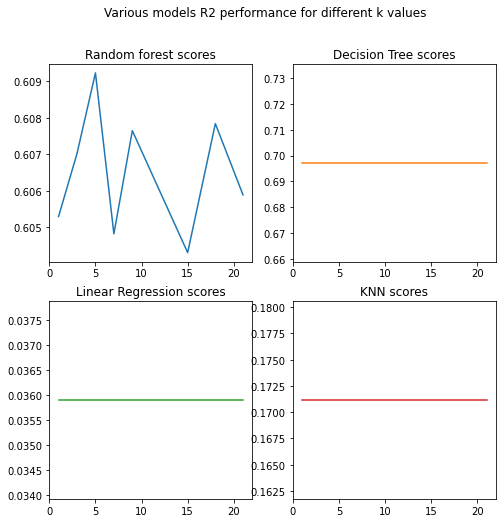

In [43]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Decision Tree Regressor

In [44]:
X = lake_bilancino[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']]
imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Depth to groundwater featutres
lake_bilancino_filtered = lake_bilancino[lake_bilancino[['Lake_Level', 'Flow_Rate']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = lake_bilancino_filtered[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']]
non_null_depth_y = lake_bilancino_filtered[['Lake_Level', 'Flow_Rate']]

imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = DecisionTreeRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(6603, 2)

In [45]:
# Final preprocessed lake_bilancino dataset

lake_bilancino_filled = pd.DataFrame(X,columns=['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci'])

lake_bilancino_filled['Date'] = lake_bilancino['Date']
lake_bilancino_filled['Lake_Level'] = predicted_target_values[:,0]
lake_bilancino_filled['Flow_Rate'] = predicted_target_values[:,1]

In [46]:
lake_bilancino_filled.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Date,Lake_Level,Flow_Rate
0,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,03/06/2002,249.606745,2.578255
1,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,04/06/2002,249.606745,2.578255
2,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,05/06/2002,249.606745,2.578255
3,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,06/06/2002,249.606745,2.578255
4,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,07/06/2002,249.606745,2.578255


In [47]:
lake_bilancino_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_S_Piero      6603 non-null   float64
 1   Rainfall_Mangona      6603 non-null   float64
 2   Rainfall_S_Agata      6603 non-null   float64
 3   Rainfall_Cavallina    6603 non-null   float64
 4   Rainfall_Le_Croci     6603 non-null   float64
 5   Temperature_Le_Croci  6603 non-null   float64
 6   Date                  6603 non-null   object 
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6603 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


**River Arno:**

In [48]:
river_arno.isnull().sum()*100/len(river_arno)

Date                          0.000000
Rainfall_Le_Croci            26.664233
Rainfall_Cavallina           26.664233
Rainfall_S_Agata             26.664233
Rainfall_Mangona             26.664233
Rainfall_S_Piero             26.664233
Rainfall_Vernio              47.876354
Rainfall_Stia                84.386029
Rainfall_Consuma             84.386029
Rainfall_Incisa              44.407935
Rainfall_Montevarchi         79.956188
Rainfall_S_Savino            84.386029
Rainfall_Laterina            84.386029
Rainfall_Bibbiena            71.059998
Rainfall_Camaldoli           84.386029
Temperature_Firenze          24.644031
Hydrometry_Nave_di_Rosano     0.584155
dtype: float64

In [49]:
# split into input and output elements
X = river_arno[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze']]
y = river_arno[['Hydrometry_Nave_di_Rosano']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

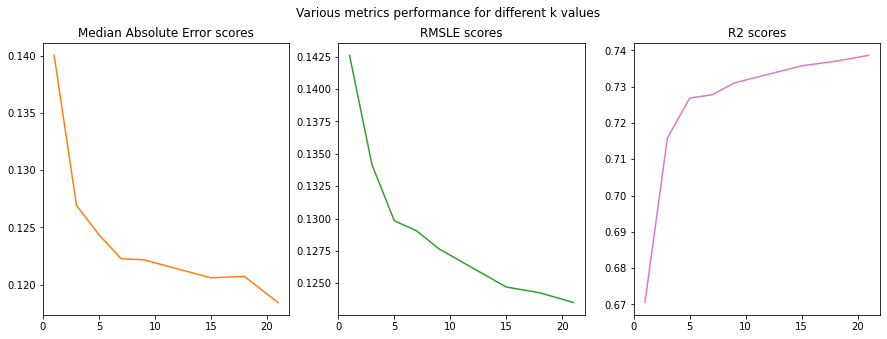

In [50]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [51]:
#Using only the rows with non-null target values i.e. Lake level, flow rate features
river_arno_filtered = river_arno[river_arno[['Hydrometry_Nave_di_Rosano']].notna().all(axis=1)]

# split into input and output elements
X = river_arno_filtered[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze']]
y = river_arno_filtered[['Hydrometry_Nave_di_Rosano']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

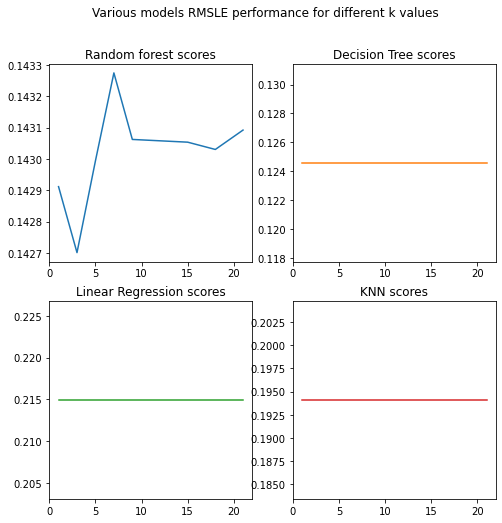

In [52]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

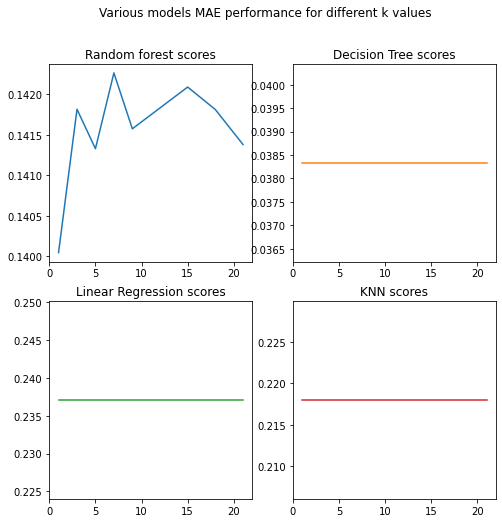

In [53]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

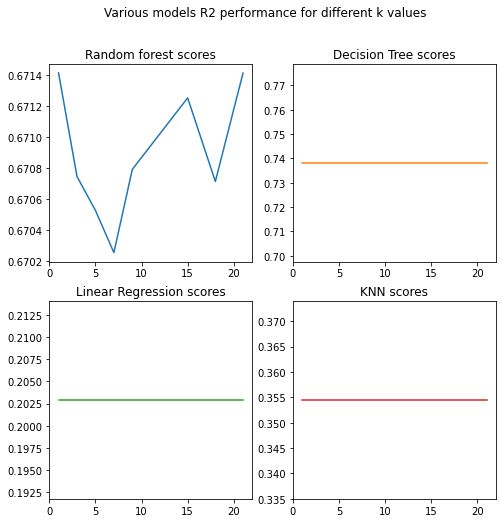

In [54]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Decision Tree Regressor

In [55]:
X = river_arno[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze']]
imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Hydrometry features
river_arno_filtered = river_arno[river_arno[['Hydrometry_Nave_di_Rosano']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = river_arno_filtered[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze']]
non_null_depth_y = river_arno_filtered[['Hydrometry_Nave_di_Rosano']]

imputer = KNNImputer(n_neighbors=17, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = DecisionTreeRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(8217,)

In [56]:
# Final preprocessed River Arno dataset

river_arno_filled = pd.DataFrame(X,columns=['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze'])

river_arno_filled['Date'] = river_arno['Date']
river_arno_filled['Hydrometry_Nave_di_Rosano'] = predicted_target_values

In [57]:
river_arno_filled.head()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Date,Hydrometry_Nave_di_Rosano
0,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.41668,2.335026,2.056709,2.4265,2.101949,2.640959,3.826968,16.605386,01/01/1998,1.602951
1,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.41668,2.335026,2.056709,2.4265,2.101949,2.640959,3.826968,16.605386,02/01/1998,1.602951
2,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.41668,2.335026,2.056709,2.4265,2.101949,2.640959,3.826968,16.605386,03/01/1998,1.602951
3,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.41668,2.335026,2.056709,2.4265,2.101949,2.640959,3.826968,16.605386,04/01/1998,1.602951
4,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.41668,2.335026,2.056709,2.4265,2.101949,2.640959,3.826968,16.605386,05/01/1998,1.602951


In [58]:
river_arno_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rainfall_Le_Croci          8217 non-null   float64
 1   Rainfall_Cavallina         8217 non-null   float64
 2   Rainfall_S_Agata           8217 non-null   float64
 3   Rainfall_Mangona           8217 non-null   float64
 4   Rainfall_S_Piero           8217 non-null   float64
 5   Rainfall_Vernio            8217 non-null   float64
 6   Rainfall_Stia              8217 non-null   float64
 7   Rainfall_Consuma           8217 non-null   float64
 8   Rainfall_Incisa            8217 non-null   float64
 9   Rainfall_Montevarchi       8217 non-null   float64
 10  Rainfall_S_Savino          8217 non-null   float64
 11  Rainfall_Laterina          8217 non-null   float64
 12  Rainfall_Bibbiena          8217 non-null   float64
 13  Rainfall_Camaldoli         8217 non-null   float

**Water Spring Amiata:**

In [59]:
spring_amiata.isnull().sum()*100/len(spring_amiata)

Date                                      0.000000
Rainfall_Castel_del_Piano                15.974356
Rainfall_Abbadia_S_Salvatore             52.103646
Rainfall_S_Fiora                         64.832376
Rainfall_Laghetto_Verde                  61.733672
Rainfall_Vetta_Amiata                    70.455456
Depth_to_Groundwater_S_Fiora_8           52.330707
Depth_to_Groundwater_S_Fiora_11bis       51.996794
Depth_to_Groundwater_David_Lazzaretti    56.698277
Temperature_Abbadia_S_Salvatore          52.143716
Temperature_S_Fiora                       0.000000
Temperature_Laghetto_Verde               51.863230
Flow_Rate_Bugnano                        73.180179
Flow_Rate_Arbure                         73.180179
Flow_Rate_Ermicciolo                     73.180179
Flow_Rate_Galleria_Alta                  73.180179
dtype: float64

In [60]:
# split into input and output elements
X = spring_amiata[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde']]
y = spring_amiata[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

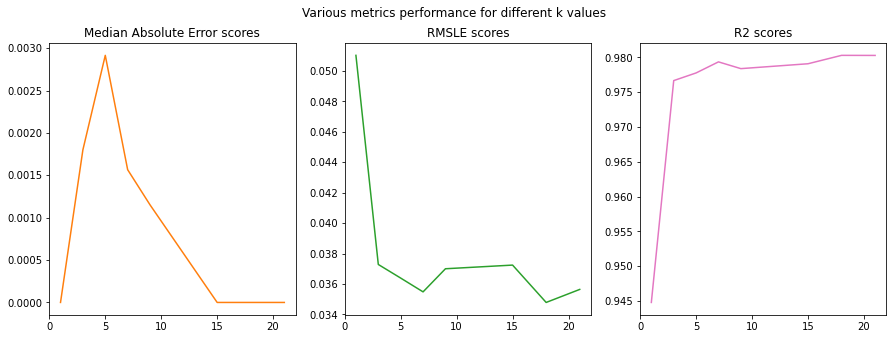

In [61]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [62]:
#Using only the rows with non-null target values i.e. flow rate features
spring_amiata_filtered = spring_amiata[spring_amiata[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']].notna().all(axis=1)]

# split into input and output elements
X = spring_amiata_filtered[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde']]
y = spring_amiata_filtered[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

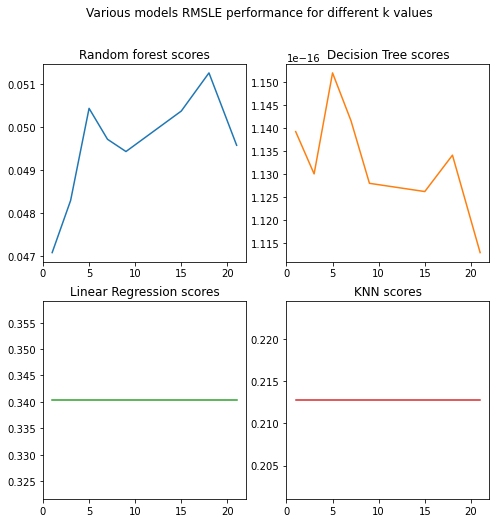

In [63]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

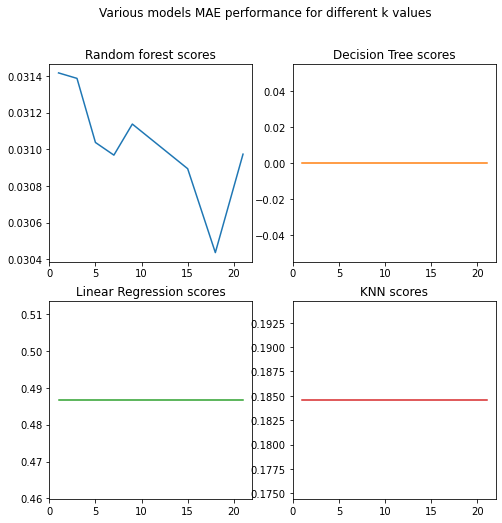

In [64]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

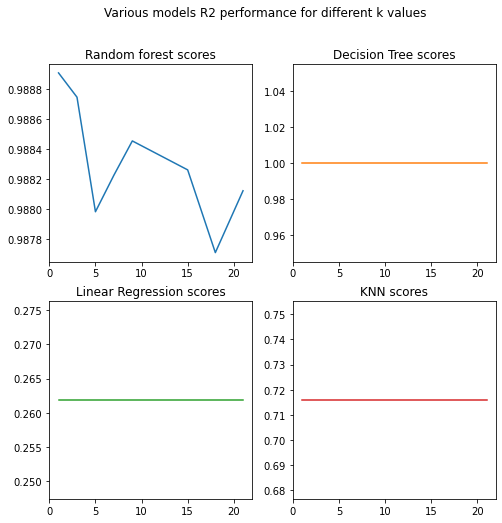

In [65]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Radom Forest Regressor

In [66]:
X = spring_amiata[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde']]
imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Flow rate features
river_arno_filtered = spring_amiata[spring_amiata[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = spring_amiata_filtered[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde']]
non_null_depth_y = spring_amiata_filtered[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']]

imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = RandomForestRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(7487, 4)

In [67]:
# Final preprocessed Spring Amiata dataset

spring_amiata_filled = pd.DataFrame(X,columns=['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde'])

spring_amiata_filled['Date'] = spring_amiata['Date']
spring_amiata_filled['Flow_Rate_Bugnano'] = predicted_target_values[:,0]
spring_amiata_filled['Flow_Rate_Arbure'] = predicted_target_values[:,1]
spring_amiata_filled['Flow_Rate_Ermicciolo'] = predicted_target_values[:,2]
spring_amiata_filled['Flow_Rate_Galleria_Alta'] = predicted_target_values[:,3]

In [68]:
spring_amiata_filled.head()

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Date,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,3.495238,3.123810,3.647619,2.695238,7.666667,-38.731905,-52.072381,-306.727143,0.066667,-0.15,-0.171429,01/01/2000,-0.367469,-2.847601,-5.995852,-20.364606
1,6.409524,5.700000,2.266667,8.952381,1.152381,-38.567143,-52.038571,-306.219524,1.597619,1.55,1.030952,02/01/2000,-0.369168,-2.862906,-6.019593,-20.479734
2,3.152381,5.880952,3.133333,8.000000,2.495238,-38.324286,-51.811905,-304.138095,3.002381,2.70,2.364286,03/01/2000,-0.321618,-2.252913,-4.537131,-21.076313
3,2.857143,4.647619,6.457143,2.257143,2.828571,-37.956667,-51.542381,-303.222381,4.514286,4.00,3.692857,04/01/2000,-0.367686,-2.728241,-5.036320,-23.590095
4,3.047619,6.152381,5.247619,5.409524,2.942857,-37.967143,-51.676667,-304.610952,5.185714,4.60,4.359524,05/01/2000,-0.337752,-2.317335,-4.495010,-21.601016


In [69]:
spring_amiata_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rainfall_Castel_del_Piano              7487 non-null   float64
 1   Rainfall_Abbadia_S_Salvatore           7487 non-null   float64
 2   Rainfall_S_Fiora                       7487 non-null   float64
 3   Rainfall_Laghetto_Verde                7487 non-null   float64
 4   Rainfall_Vetta_Amiata                  7487 non-null   float64
 5   Depth_to_Groundwater_S_Fiora_8         7487 non-null   float64
 6   Depth_to_Groundwater_S_Fiora_11bis     7487 non-null   float64
 7   Depth_to_Groundwater_David_Lazzaretti  7487 non-null   float64
 8   Temperature_Abbadia_S_Salvatore        7487 non-null   float64
 9   Temperature_S_Fiora                    7487 non-null   float64
 10  Temperature_Laghetto_Verde             7487 non-null   float64
 11  Date

**Water Spring Lupa:**

In [70]:
spring_lupa.isnull().sum()*100/len(spring_lupa)

Date              0.000000
Rainfall_Terni    0.000000
Flow_Rate_Lupa    9.097404
dtype: float64

In [71]:
# split into input and output elements
X = spring_lupa[['Rainfall_Terni']]
y = spring_lupa[['Flow_Rate_Lupa']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

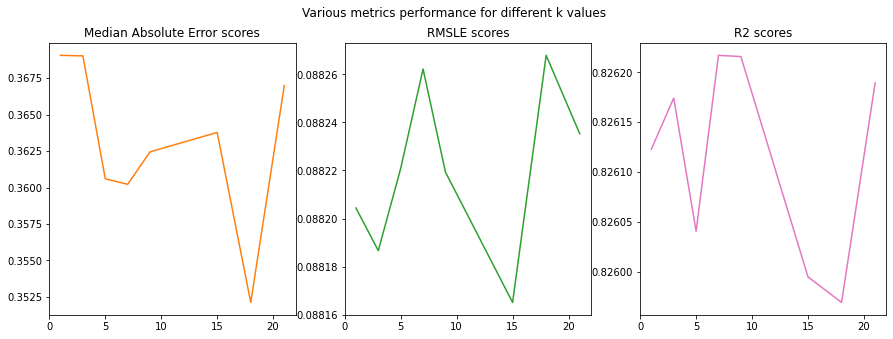

In [72]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [73]:
#Using only the rows with non-null target values i.e. flow rate features
spring_lupa_filtered = spring_lupa[spring_lupa[['Flow_Rate_Lupa']].notna().all(axis=1)]

# split into input and output elements
X = spring_lupa_filtered[['Rainfall_Terni']]
y = spring_lupa_filtered[['Flow_Rate_Lupa']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

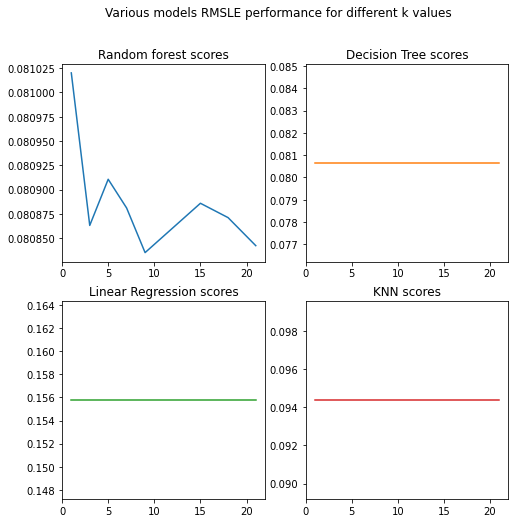

In [74]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

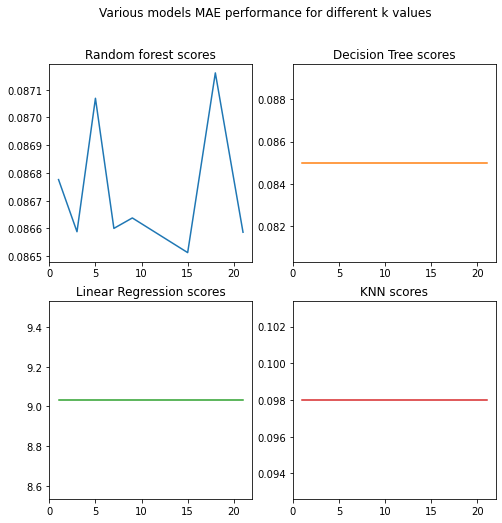

In [75]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

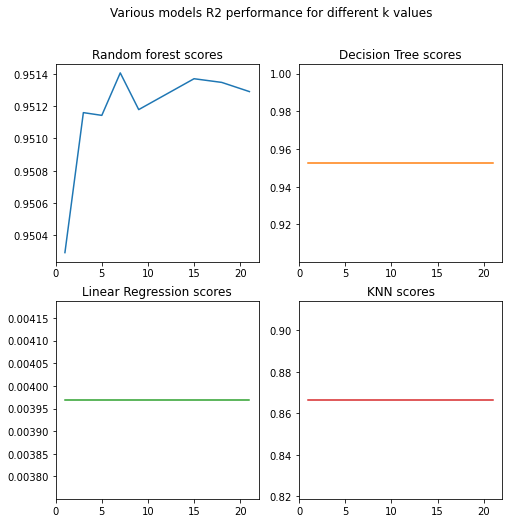

In [76]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Random Forest Regressor

In [77]:
X = spring_lupa[['Rainfall_Terni']]
imputer = KNNImputer(n_neighbors=9, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. flow rate featutres
spring_lupa_filtered = spring_lupa[spring_lupa[['Flow_Rate_Lupa']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = spring_lupa_filtered[['Rainfall_Terni']]

non_null_depth_y = spring_lupa_filtered[['Flow_Rate_Lupa']]

imputer = KNNImputer(n_neighbors=9, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = RandomForestRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(4199,)

In [78]:
# Final preprocessed Spring Lupa dataset

spring_lupa_filled = pd.DataFrame(X,columns=['Rainfall_Terni'])

spring_lupa_filled['Date'] = spring_lupa['Date']
spring_lupa_filled['Flow_Rate_Lupa'] = predicted_target_values

In [79]:
spring_lupa_filled.head()

,Rainfall_Terni,Date,Flow_Rate_Lupa
0,2.797,01/01/2009,-98.654997
1,2.797,02/01/2009,-98.654997
2,2.797,03/01/2009,-98.654997
3,2.797,04/01/2009,-98.654997
4,2.797,05/01/2009,-98.654997


In [80]:
spring_lupa_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rainfall_Terni  4199 non-null   float64
 1   Date            4199 non-null   object 
 2   Flow_Rate_Lupa  4199 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


**Water Spring Madonna di Canneto:**

In [81]:
spring_madonna.isnull().sum()*100/len(spring_madonna)

Date                             0.289110
Rainfall_Settefrati             17.860585
Temperature_Settefrati          17.860585
Flow_Rate_Madonna_di_Canneto    55.444908
dtype: float64

In [82]:
# split into input and output elements
X = spring_madonna[['Rainfall_Settefrati', 'Temperature_Settefrati']]
y = spring_madonna[['Flow_Rate_Madonna_di_Canneto']]


k_values = [1,3,5,7,9,15,18,21]
median_ae_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))
    
    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))
    
    print('*'*10)
    
    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)
    
    yhat = rf.predict(Xtrans)
    
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

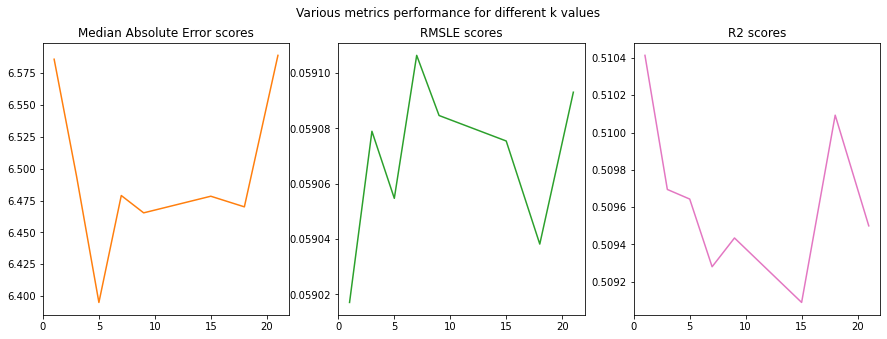

In [83]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Various metrics performance for different k values')

axs[0].plot(k_values, median_ae_errors, 'tab:orange')
axs[0].set_title('Median Absolute Error scores')
axs[1].plot(k_values, rmsle_errors, 'tab:green')
axs[1].set_title('RMSLE scores')
axs[2].plot(k_values, r2_errors, 'tab:pink')
axs[2].set_title('R2 scores')


In [84]:
#Using only the rows with non-null target values i.e. flow rate features
spring_madonna_filtered = spring_madonna[spring_madonna[['Flow_Rate_Madonna_di_Canneto']].notna().all(axis=1)]

# split into input and output elements
X = spring_madonna_filtered[['Rainfall_Settefrati', 'Temperature_Settefrati']]
y = spring_madonna_filtered[['Flow_Rate_Madonna_di_Canneto']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    
    X = Xtrans
    
    rf = RandomForestRegressor()
    rf.fit(X, y)
    
    yhat = rf.predict(X)
    
    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X, y)
    
    yhat = dt.predict(X)
    
    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    yhat = lr.predict(X)
    
    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)
    
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)
    
    yhat = knn_reg.predict(X)
    
    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)
    
    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)
    
    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)
    
    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

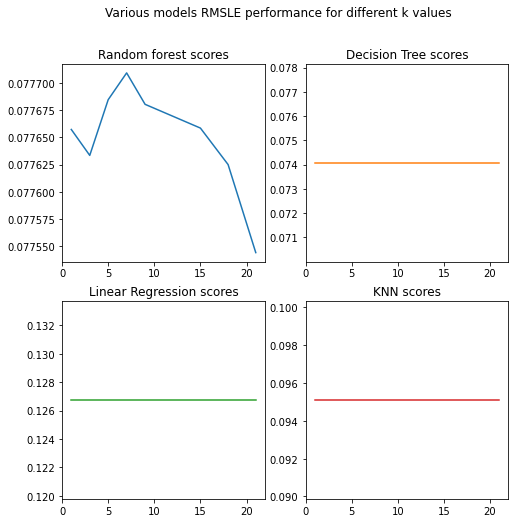

In [85]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

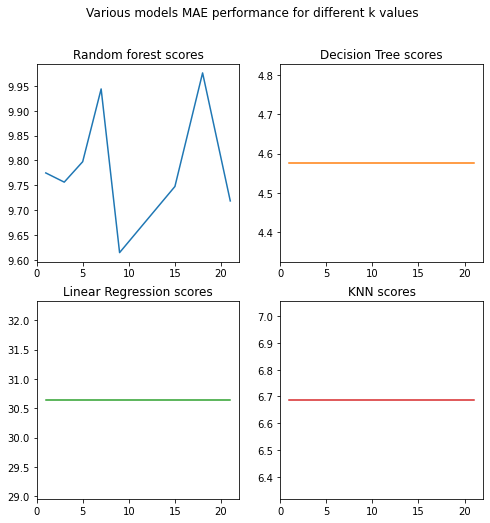

In [86]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

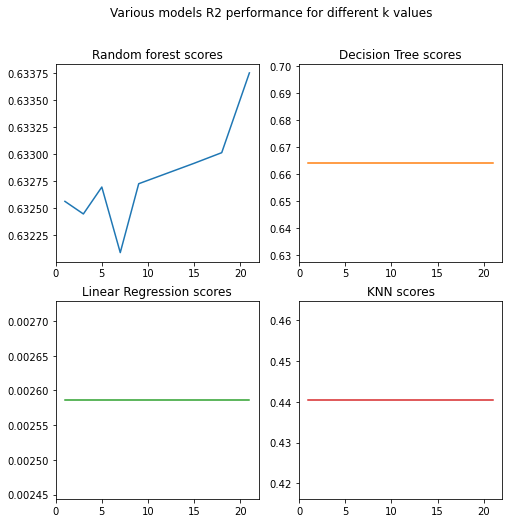

In [87]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

Now using the best k as seen above and fitting the best model i.e. Decision Tree Regressor

In [88]:
X = spring_madonna[['Rainfall_Settefrati', 'Temperature_Settefrati']]
imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. flow rate featutres
spring_madonna_filtered = spring_madonna[spring_madonna[['Flow_Rate_Madonna_di_Canneto']].notna().all(axis=1)]

# split into input and output elements
non_null_depth_X = spring_madonna_filtered[['Rainfall_Settefrati', 'Temperature_Settefrati']]

non_null_depth_y = spring_madonna_filtered[['Flow_Rate_Madonna_di_Canneto']]

imputer = KNNImputer(n_neighbors=21, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = DecisionTreeRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(3113,)

In [89]:
# Final preprocessed Spring Madonna di Canneto dataset

spring_madonna_filled = pd.DataFrame(X,columns=['Rainfall_Settefrati', 'Temperature_Settefrati'])

spring_madonna_filled['Date'] = spring_madonna['Date']
spring_madonna_filled['Flow_Rate_Madonna_di_Canneto'] = predicted_target_values

In [90]:
spring_madonna_filled.head()

,Rainfall_Settefrati,Temperature_Settefrati,Date,Flow_Rate_Madonna_di_Canneto
0,0.0,5.25,01/01/2012,284.981632
1,5.6,6.65,02/01/2012,289.545561
2,10.0,8.85,03/01/2012,285.967968
3,0.0,6.75,04/01/2012,289.064397
4,1.0,5.55,05/01/2012,296.607544


In [91]:
spring_madonna_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rainfall_Settefrati           3113 non-null   float64
 1   Temperature_Settefrati        3113 non-null   float64
 2   Date                          3104 non-null   object 
 3   Flow_Rate_Madonna_di_Canneto  3113 non-null   float64
dtypes: float64(3), object(1)
memory usage: 97.4+ KB


In [99]:
spring_madonna_filled.dropna(inplace=True)

In [100]:
spring_madonna_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3104 entries, 0 to 3103
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rainfall_Settefrati           3104 non-null   float64
 1   Temperature_Settefrati        3104 non-null   float64
 2   Date                          3104 non-null   object 
 3   Flow_Rate_Madonna_di_Canneto  3104 non-null   float64
dtypes: float64(3), object(1)
memory usage: 121.2+ KB


In [116]:
# save the preprocessed datasets
aquifer_auser_filled.to_csv('Preprocessed_datasets/aquifer_auser_preprocessed.csv',index=False)
aquifer_doganella_filled.to_csv('Preprocessed_datasets/aquifer_doganella_preprocessed.csv',index=False)
aquifer_luco_filled.to_csv('Preprocessed_datasets/aquifer_luco_preprocessed.csv',index=False)
aquifer_petrignago_filled.to_csv('Preprocessed_datasets/aquifer_petrignago_preprocessed.csv',index=False)
river_arno_filled.to_csv('Preprocessed_datasets/river_arno_preprocessed.csv',index=False)
lake_bilancino_filled.to_csv('Preprocessed_datasets/lake_bilancino_preprocessed.csv',index=False)
spring_amiata_filled.to_csv('Preprocessed_datasets/spring_amiata_preprocessed.csv',index=False)
spring_lupa_filled.to_csv('Preprocessed_datasets/spring_lupa_preprocessed.csv',index=False)
spring_madonna_filled.to_csv('Preprocessed_datasets/spring_madonna_preprocessed.csv',index=False)